## Observations and Insights 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset (Mouse ID)
comb_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')


# Display the data table for preview
comb_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice. 
# comb_df.dtypes
len(comb_df["Mouse ID"].unique())

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# There are 5 duplicates and they are only in the study_results data frame. 
dup_mt_df = pd.DataFrame(comb_df, columns = ["Mouse ID", "Timepoint"])

dup_mt_df = dup_mt_df[dup_mt_df.duplicated()]
dup_mt_df


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [7]:
dup_study = pd.DataFrame(study_results, columns = ["Mouse ID", "Timepoint"])

dup_study = dup_study[dup_study.duplicated()]

dup_study

,Mouse ID,Timepoint
137,g989,0
360,g989,5
681,g989,10
869,g989,15
1111,g989,20


In [8]:
# Print these to find duplicates in each of the two main data frames
g989_meta = mouse_metadata.loc[mouse_metadata["Mouse ID"] == "g989", :]
g989_study = study_results.loc[study_results["Mouse ID"] == "g989", :]
g989_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_all = comb_df.loc[comb_df["Mouse ID"] =="g989", :]
g989_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = comb_df.loc[comb_df["Mouse ID"] != "g989", :]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame. Since we took out the Mouse ID g989 there should be 248
clean_mouse_unique = len(clean_df['Mouse ID'].unique())
clean_mouse_unique


248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].describe()
# This method is the most straighforward, creating multiple series and putting them all together at the end.

clean_df.groupby("Drug Regimen").mean

#df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std','sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#group data by drug and timepoint 
# This method produces everything in a single groupby function

clean_df.groupby("Drug Regimen").agg({"Timepoint": ['mean', 'median', 'var', 'std','sem']})


Timepoint                                        
                   mean median         var        std       sem
Drug Regimen                                                   
Capomulin     21.565217     20  206.928043  14.384994  0.948518
Ceftamin      19.747191     20  204.031772  14.283969  1.070629
Infubinol     18.174157     15  181.534470  13.473473  1.009879
Ketapril      19.707447     20  196.839089  14.029935  1.023238
Naftisol      19.623656     20  201.208951  14.184814  1.040081
Placebo       18.674033     15  192.954266  13.890798  1.032495
Propriva      17.060811     15  187.050699  13.676648  1.124214
Ramicane      21.425439     20  203.796178  14.275720  0.945433
Stelasyn      19.226519     20  191.620626  13.842710  1.028921
Zoniferol     19.368132     15  206.918979  14.384679  1.066263

## Bar and Pie Charts

<BarContainer object of 1880 artists>

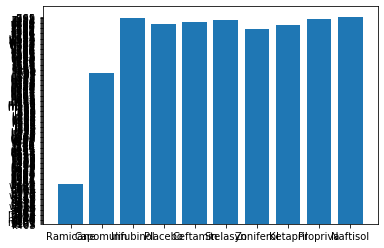

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

drug_bar = clean_df["Drug Regimen"]
mouse_bar = clean_df ['Mouse ID']

plt.bar(drug_bar, mouse_bar)

In [30]:
# Creating new data frame for bar graph
regimen_pandas_bar = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_pandas_bar


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

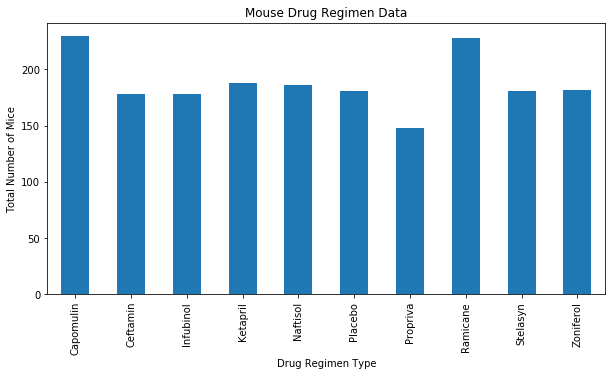

<Figure size 432x288 with 0 Axes>

In [31]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
regimen_data_points.plot(kind="bar", figsize=(10,5))

# Bar Titles
plt.title("Mouse Drug Regimen Data")
plt.xlabel("Drug Regimen Type")
plt.ylabel("Total Number of Mice")

#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Total Number of Mice')

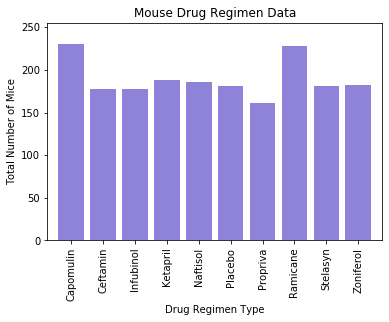

In [44]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Create an arraw with the datapoints
mouse = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(regimen_data_points))

plt.bar(x_axis, mouse, color='slateblue', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mouse)+25)

plt.title("Mouse Drug Regimen Data")
plt.xlabel("Drug Regimen Type")
plt.ylabel("Total Number of Mice")

In [47]:
# Group by "Mouse ID" and "Sex" in order to get count of Male and Female
gender_df = clean_df.groupby(["Mouse ID","Sex"])
gender_df

mouse_gender_df = pd.DataFrame(gender_df.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# Create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# Format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

mouse_gender


,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


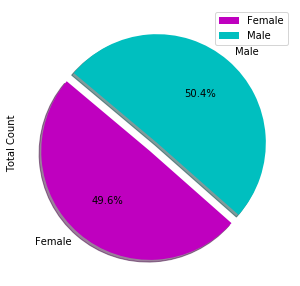

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ['m', 'c']

explode = (0.1, 0)

plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), 
                             colors = colors, startangle=140, 
                             explode = explode, 
                             shadow = True, autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
